In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [3]:
files = [file for file in os.listdir('./Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()
files
for file in files:
    
    df = pd.read_csv('./Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data , df])

    
all_months_data.head()
all_months_data.to_csv("all_data.csv", index = False)    

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Data

In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.dropna(inplace = True)
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Augment data with additional columns

#### Add Month columns

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]


In [8]:
# Use either      
# all_data.query('Month == "Or"')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Month'].astype(int)

In [9]:
isinstance(all_data,pd.Series)

False

In [10]:
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


In [11]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

### Add Sales column sales = price of each * quantity

#### convert to int 

In [12]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
# all_data['Price Each'] = all_data['Price Each'].astype(float) OR
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])   #to_numeric converts to the right type of numeric type

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 01:  What was the best month fopr sale? And how much was earned that month?


In [13]:
# best_month_sales= all_data.groupby('Month').sum().sort_values('Sales', ascending = False).reset_index()
best_month_sales= all_data.groupby('Month').sum()
best_month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


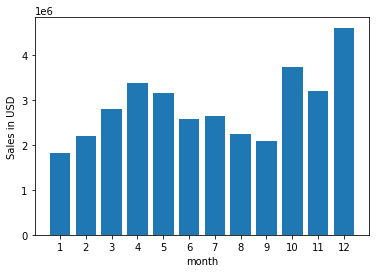

In [14]:

months = range(1,13)
plt.bar(months,  best_month_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('month')
plt.show()

## What city had the best city?

### Add city column

In [15]:
def get_city(address):
    return address.split(',')[1]   
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' '+ get_state(x) ) # to avoid situations like kashmir
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


                City  Quantity Ordered    Price Each   Month         Sales  \
0         Atlanta GA           16602.0  2.779908e+06  104794  2.795499e+06   
1          Austin TX           11153.0  1.809874e+06   69829  1.819582e+06   
2          Boston MA           22528.0  3.637410e+06  141112  3.661642e+06   
3          Dallas TX           16730.0  2.752628e+06  104620  2.767975e+06   
4     Los Angeles CA           33289.0  5.421435e+06  208325  5.452571e+06   
5   New York City NY           27932.0  4.635371e+06  175741  4.664317e+06   
6        Portland ME            2750.0  4.471893e+05   17144  4.497583e+05   
7        Portland OR           11303.0  1.860558e+06   70621  1.870732e+06   
8   San Francisco CA           50239.0  8.211462e+06  315520  8.262204e+06   
9         Seattle WA           16553.0  2.733296e+06  104941  2.747755e+06   

     Hour   Minute  
0  214264   442932  
1  141946   289060  
2  288225   590442  
3  214390   435155  
4  427444   866638  
5  357696   733

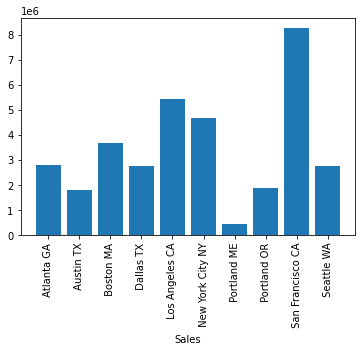

In [40]:
best_city_sales = all_data.groupby('City').sum().reset_index()
print(best_city_sales)
plt.bar( best_city_sales['City'] , best_city_sales['Sales'])
plt.xticks(best_city_sales['City'], rotation = 'vertical')
plt.xlabel('Sales')
plt.show()


## What time should we display the ad to maximize likelihood of customer's buying product?

#### Convert to date hour minute

In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


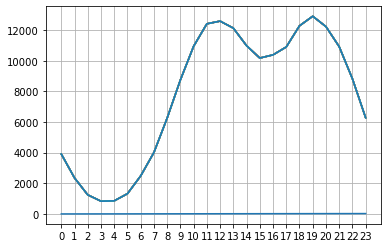

In [18]:
best_time = all_data.groupby('Hour').count().reset_index()
plt.plot(best_time['Hour'], best_time)
plt.xticks(best_time['Hour'])
plt.grid()
plt.show()

## Which product are mostly sold together?

In [19]:
order_id = all_data[all_data['Order ID'].duplicated(keep = False)]


In [20]:
## Group all the product by a single order

order_id['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
order_id

<ipython-input-20-7681d715ce07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_id['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49,"Google Phone,USB-C Charging Cable"


In [21]:
isinstance(order_id,pd.DataFrame)

True

In [22]:

order_id = order_id[['Order ID','Grouped']].drop_duplicates()
  
order_id.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
order_id['Grouped'].count() 

7136

In [28]:
count = Counter()

for row in order_id['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

    
for key, value in count.most_common(10):
    print(key , value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


                       Product  Quantity Ordered
0                 20in Monitor            4129.0
1       27in 4K Gaming Monitor            6244.0
2             27in FHD Monitor            7550.0
3       34in Ultrawide Monitor            6199.0
4        AA Batteries (4-pack)           27635.0
5       AAA Batteries (4-pack)           31017.0
6     Apple Airpods Headphones           15661.0
7   Bose SoundSport Headphones           13457.0
8                Flatscreen TV            4819.0
9                 Google Phone            5532.0
10                    LG Dryer             646.0
11          LG Washing Machine             666.0
12    Lightning Charging Cable           23217.0
13          Macbook Pro Laptop            4728.0
14             ThinkPad Laptop            4130.0
15        USB-C Charging Cable           23975.0
16             Vareebadd Phone            2068.0
17            Wired Headphones           20557.0
18                      iPhone            6849.0


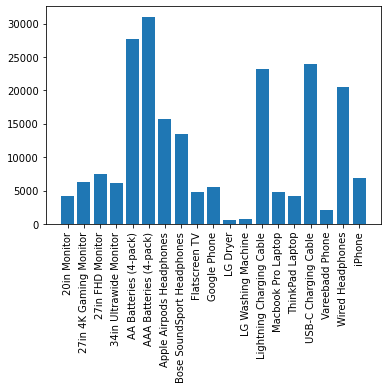

In [60]:
product_group = all_data.groupby('Product')
quantity = product_group.sum()['Quantity Ordered'].reset_index()
print(quantity)
plt.bar(quantity['Product'], quantity['Quantity Ordered'])
plt.xticks(quantity['Product'], rotation = 'vertical')
plt.show()

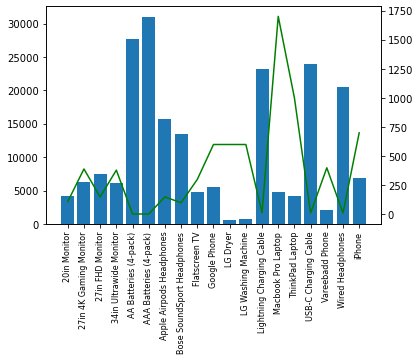

In [74]:
price = all_data.groupby('Product').mean()['Price Each']
# p = price.to_frame()
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quantity['Product'], quantity['Quantity Ordered'])
ax2.plot(quantity['Product'], p['Price Each'], 'g-')
ax1.set_xticklabels(quantity['Product'] , rotation = 'vertical', size = 8)
plt.show()
